# Estimate pi
Write a program that estimates the value of pi by the 'throw darts at a wall'
   method.  That is, generate random `(x,y)` points and see if they fall within
   the unit circle, and use these results to estimate pi. 
   
Besides these instructions,
   I will not give any more requirements to how you structure this exercise.
   You may want to start with just writing functions and then at some point
   reorganize into an object-oriented design. You may use .py files or this notebook or a mixture of both, it is entirely up to you. Please make sure that all the files you use are in a single folder that you will create inside the `day2/exercises` directory.

* Do this estimate using 100, 1000, 10,000, and 1e6 points.
* How long does the calculation take for different numbers of points?  Make a figure that illustrates how the calculation time depends on the number of points.      
* Make a figure that displays the "darts."
* Run this calculation many times for a single `N` (number of darts), and plot a histogram of the results.  What is the mean and standard deviation of these estimates?
* Make a plot that illustrates the precision of the pi estimate as a function of number of random points used.

Make a notebook that demonstrates how your `pi_estimate` module works, as
    well as presenting the results of all your calculations.  The notebook
    should have minimal complicated code in it; rather, it should initialize
    objects and call functions defined within the `pi_estimate` module.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def throw(ndarts):
    '''Function that 'throws n darts'
    
    This functions generates n sets of coordinates that are each drawn from a uniform distribution between -1 and 1
    
    Parameters
    n: int
        Number of coordinates to draw (darts to throw)
    Returns
    darts: array
        array of size (2xn) with the coordinates of darts thrown
    '''
    return (np.random.rand(2,ndarts)-0.5)*2
    

In [3]:
def is_in_unit_circle(dart):
    ''' Checks if a dart is in the unit circle
    
    function that checks whether a coordinate `dart` is inside the unit circle
    
    Paramters
    dart: array
        Array of coordinates (dart positions) with size (2xn)
    Returns
    isincircle: array (boolean)
        Array of size n set to `True` where `dart` is in the unit circle, false otherwise.  
    '''
    
    #Distance to origin for each dart
    distance = np.sqrt(np.sum(dart**2, axis = 0))
    
    isincircle = distance < 1
    
    return isincircle
        

In [4]:
def plot_darts(ndarts, title = 'Throw of darts'):
    '''
    Function that displays a throw of darts and highlights darts in the unit circle with a different colour
    
    Parameters
    ndarts: integer
        number of dart throws
    title: string
        title for the plot
    Returns
    None
    '''
    darts = throw(ndarts)
    incircle = is_in_unit_circle(darts)
    
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.plot(darts[0], darts[1], 'ob', label = 'not in unit circle')
    plt.plot(darts[0,incircle], darts[1,incircle], 'or', label = 'in unit circle')
    plt.legend()
    plt.show()
    return

In [5]:
def estimate_pi(ndarts):
    ''' Function that estimates pi using the 'throw of darts' method
    
    Parameters
    ndarts: int
        number of darts to throw
    Returns
    pi: float
        An estimate for pi
    '''
    darts = throw(ndarts)
    incircle = is_in_unit_circle(darts)
    return 4.*np.sum(incircle)/ndarts

In [6]:
#estimates pi with different dart throws:
[print('estimate of pi from {} dart throws: {}.'.format(i,estimate_pi(i))) for i in [10,100,1000,10000, 100000]]

estimate of pi from 10 dart throws: 3.2.
estimate of pi from 100 dart throws: 3.12.
estimate of pi from 1000 dart throws: 3.184.
estimate of pi from 10000 dart throws: 3.1668.
estimate of pi from 100000 dart throws: 3.15344.


[None, None, None, None, None]

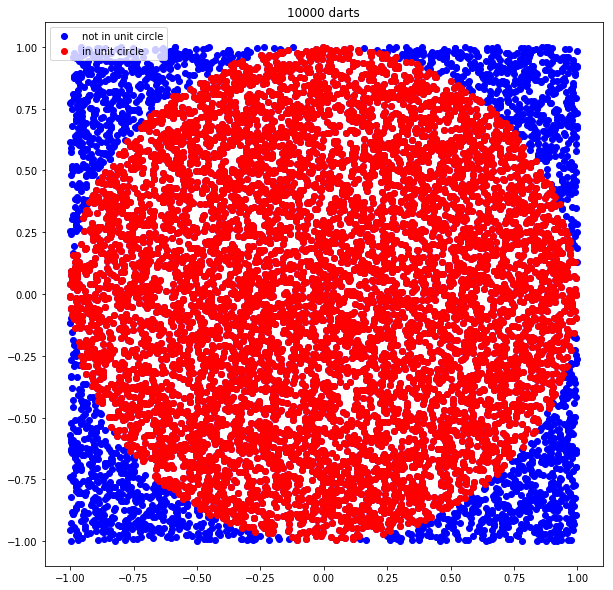

In [7]:
#Display a throw of 10000 darts:
plot_darts(10000, title = '10000 darts')

In [8]:
def make_realisation(nrea, ndarts):
    '''function that makes `nrea` realisations of `ndarts` dart throws and records the result
    
    Parameters
    nrea: int
        number of realisation
    ndarts: int
        number of darts thrown at each realisation
    returns:
    pies: array
        array of the estimates of pi at each iteration
    '''
    pies = []
    
    [pies.append(estimate_pi(ndarts)) for i in range(nrea)]
    return np.array(pies)
        

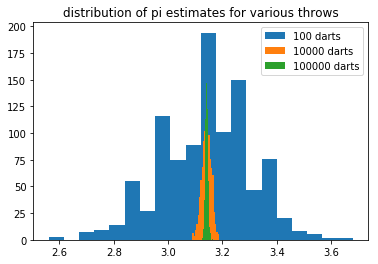

In [9]:
#Shaw distribution of realisations for 100, 10000 and 100000 throws of darts
rea100 = make_realisation(1000, 100)
rea10000 = make_realisation(1000, 10000)
rea100000 = make_realisation(1000, 100000)

#Histogram of these realisations
plt.title('distribution of pi estimates for various throws')
plt.hist(rea100, bins = 20, label = '100 darts')
plt.hist(rea10000, bins = 20, label = '10000 darts')
plt.hist(rea100000, bins = 20, label = '100000 darts')
plt.legend()
plt.show()

In [10]:
def plot_pi_accuracy(nrea, nthrows):
    '''
    Function that plots the mean and standard deviation of the results of `nrea` realisations 
    of dart `nthrows` dart throws
    
    Parameters
    nrea: int
        number of realisations of throws for each number of throws
    nthrows: array
        array containing numbers of throws for which we want `nrea` realisations
    Returns
    None
    '''
    mean = []
    std = []
    for throw in nthrows:
        realisations = make_realisation(nrea, throw)
        mean.append(realisations.mean())
        std.append(realisations.std())
    plt.title('Accuracy of throw darts method')
    plt.errorbar(range(np.size(nthrows)), mean, fmt = 'o', yerr = std, label = 'mean estimate for pi')
    plt.plot([0,np.size(nthrows)], [np.pi, np.pi], label = 'True pi (numpy)')
    plt.xlabel('number or darts')
    plt.ylabel('pi estimate')
    plt.xticks(range(np.size(nthrows)), (nthrows))
    plt.legend()
    plt.show()

In [ ]:
plot_pi_accuracy(1000, [10,100,1000,10000,1000000])